# Variational Quantum Classifier


In this notebook, we are going to train Aqua's Variational Quantum Classifier to classify instances of a dataset

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from qiskit import Aer
from qiskit.ml.datasets import breast_cancer
from qiskit.circuit.library import ZZFeatureMap
from qiskit.circuit.library.n_local.two_local import TwoLocal
from qiskit.aqua import QuantumInstance
from qiskit.aqua.algorithms import VQC
from qiskit.aqua.components.optimizers import COBYLA

/Users/usamazulfiqar/.pyenv/versions/3.7.9/lib/python3.7/site-packages/qiskit/aqua/__init__.py:86: DeprecationWarning: The package qiskit.aqua is deprecated. It was moved/refactored to qiskit-terra For more information see <https://github.com/Qiskit/qiskit-aqua/blob/main/README.md#migration-guide>
  warn_package('aqua', 'qiskit-terra')
/Users/usamazulfiqar/.pyenv/versions/3.7.9/lib/python3.7/site-packages/qiskit/ml/__init__.py:40: DeprecationWarning: The package qiskit.ml is deprecated. It was moved/refactored to qiskit_machine_learning (pip install qiskit-machine-learning). For more information see <https://github.com/Qiskit/qiskit-aqua/blob/main/README.md#migration-guide>
  warn_package('ml', 'qiskit_machine_learning', 'qiskit-machine-learning')


We choose the feature map and the variational form

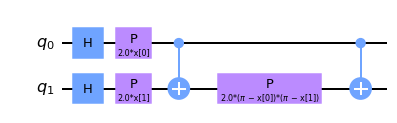

In [2]:
feature_map = ZZFeatureMap(feature_dimension=2, reps=1, entanglement='linear')
feature_map.draw(output="mpl")

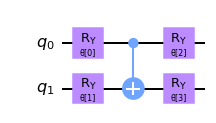

In [3]:
var_form = TwoLocal(num_qubits=2, rotation_blocks = 'ry', entanglement_blocks = 'cx', entanglement = 'linear', reps = 1)
var_form.draw(output="mpl")

We create the training dataset

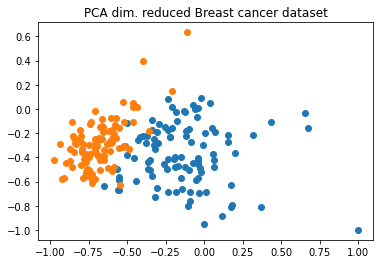

In [4]:
sample_Total, training_input, test_input, class_labels = breast_cancer(
    training_size=100,
    test_size=10,
    n=2,
    plot_data=True
)

After we have generated the training data and defined the feature map and variational form, we can now train the VQC. 

In [5]:
backend = Aer.get_backend('statevector_simulator')
quantum_instance = QuantumInstance(backend)
optimizer = COBYLA()
vqc = VQC(optimizer = optimizer, feature_map = feature_map, var_form = var_form, 
          training_dataset = training_input, test_dataset = test_input)
result = vqc.run(quantum_instance)
print(result)

/opt/conda/lib/python3.8/site-packages/qiskit/aqua/quantum_instance.py:135: DeprecationWarning: The class qiskit.aqua.QuantumInstance is deprecated. It was moved/refactored to qiskit.utils.QuantumInstance (pip install qiskit-terra). For more information see <https://github.com/Qiskit/qiskit-aqua/blob/main/README.md#migration-guide>
  warn_class('aqua.QuantumInstance',
/opt/conda/lib/python3.8/site-packages/qiskit/aqua/components/optimizers/optimizer.py:49: DeprecationWarning: The package qiskit.aqua.components.optimizers is deprecated. It was moved/refactored to qiskit.algorithms.optimizers (pip install qiskit-terra). For more information see <https://github.com/Qiskit/qiskit-aqua/blob/main/README.md#migration-guide>
  warn_package('aqua.components.optimizers',
/opt/conda/lib/python3.8/site-packages/qiskit/aqua/algorithms/classifiers/vqc.py:96: DeprecationWarning: The package qiskit.aqua.algorithms.classifiers is deprecated. It was moved/refactored to qiskit_machine_learning.algorithms

{'num_optimizer_evals': 84, 'min_val': 0.5233992566472875, 'opt_params': array([ 1.2342474 ,  2.78937283, -0.62448897, -0.87950296]), 'eval_time': 114.5287971496582, 'eval_count': 84, 'training_loss': 0.5233992566472875, 'testing_accuracy': 0.8, 'test_success_ratio': 0.8, 'testing_loss': 0.5527247330720544}


We now select more complicated feature maps and variational forms

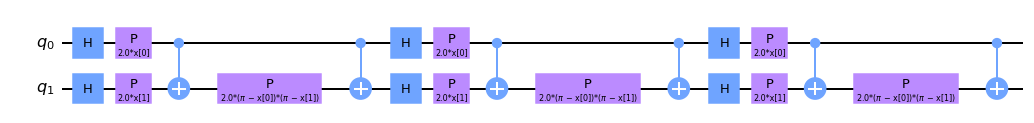

In [9]:
feature_map = ZZFeatureMap(feature_dimension=2, reps=3, entanglement='linear')
feature_map.draw(output="mpl")

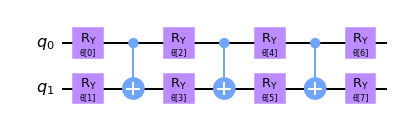

In [10]:
var_form = TwoLocal(num_qubits=2, rotation_blocks = 'ry', entanglement_blocks = 'cx', entanglement = 'linear', reps = 3)
var_form.draw(output="mpl")

And we train again the VQC

In [11]:
vqc = VQC(optimizer = optimizer, feature_map = feature_map, var_form = var_form, 
          training_dataset = training_input, test_dataset = test_input)
result = vqc.run(quantum_instance)
print(result)

{'num_optimizer_evals': 147, 'min_val': 0.49138320601083024, 'opt_params': array([-0.034657  , -2.12058605,  1.63128761, -0.26927108,  0.94945024,
       -1.03261139, -0.66594638, -1.64849895]), 'eval_time': 277.38829278945923, 'eval_count': 147, 'training_loss': 0.49138320601083024, 'testing_accuracy': 0.75, 'test_success_ratio': 0.75, 'testing_loss': 0.472569954531179}


For reps = 2 in feature map and var_form.
{'num_optimizer_evals': 90, 'min_val': 0.45028719936789025, 'opt_params': array([ 1.84827469, -1.47970789, -0.88394656,  1.10340253, -2.02807251,
        1.39620796]), 'eval_time': 147.7524130344391, 'eval_count': 90, 'training_loss': 0.45028719936789025, 'testing_accuracy': 0.9, 'test_success_ratio': 0.9, 'testing_loss': 0.40781941145056405}